In [6]:
import time
import numpy as np
import pandas as pd
from numpy import std
from numpy import mean
import scikitplot as skplt
import matplotlib.pyplot as plt

from random import randint
from tensorflow import keras 

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, average_precision_score

ds = pd.read_csv('TRNcod.xls', delimiter = "\t")

# Shuffle no dataset
ds = ds.sample(frac=1).reset_index(drop=True)

In [ ]:
# print([d for d in ds.columns])

In [7]:
# inadimplentes = pd.DataFrame(list(filter(lambda x: x == 1, ds['IND_BOM_1_2'])))

# Selecionando quem é inadimplente
inadimplentes = ds[ds['IND_BOM_1_2'] == 1]

# Selecionando quem é adimplente
adimplente = ds[ds['IND_BOM_1_2'] == 0]

global treino_ina
global teste_ina
global valid_ina
global treino_adi
global teste_adi
global valid_adi


# Dividindo datasets
treino_ina = inadimplentes[:int(len(inadimplentes)/2)]
teste_ina  = inadimplentes[int(len(inadimplentes)/2):int((len(inadimplentes)*3)/4)]
valid_ina  = inadimplentes[int((len(inadimplentes)*3)/4):]

treino_adi = adimplente[:int(len(adimplente)/2)]
teste_adi  = adimplente[int(len(adimplente)/2):int((len(adimplente)*3)/4)]
valid_adi  = adimplente[int((len(adimplente)*3)/4):]

# Equalizando tamanho de datasets treino e validação dos inadimplentes ao de adimplentes
treino_ina = treino_ina.loc[treino_ina.index.repeat(2)].drop('INDEX', axis=1)
treino_ina["COPIA"] = treino_ina.duplicated()
treino_ina.sort_values(by="COPIA", inplace=True, ignore_index=True)
treino_ina = treino_ina.iloc[ : ( len(treino_adi) - len(treino_ina) ), :  ]
treino_ina.drop(columns=["COPIA"], axis=1, inplace=True)

treino_adi.drop(columns=['INDEX'], axis=1, inplace=True)

valid_ina  = valid_ina.loc[valid_ina.index.repeat(2)].drop('INDEX', axis=1)
valid_ina["COPIA"] = valid_ina.duplicated()
valid_ina.sort_values(by="COPIA", inplace=True, ignore_index=True)
valid_ina = valid_ina.iloc[ : ( len(valid_adi) - len(valid_ina) ), :  ]
valid_ina.drop(columns=["COPIA"], axis=1, inplace=True)
# Fim da equalização

print('Tamanhos de inadimplentes: \nTreino: {}\nTeste: {}\nValidação: {}\n'.format(len(treino_ina.values), len(teste_ina.values), len(valid_ina.values)))
print('Tamanhos de adimplentes: \nTreino: {}\nTeste: {}\nValidação: {}\n'.format(len(treino_adi.values), len(teste_adi.values), len(valid_adi.values)))
print('Colunas: {}'.format(len([d for d in ds.columns])))
ds.drop(labels="INDEX", axis=1, inplace=True)

/home/vitor/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Tamanhos de inadimplentes: 
Treino: 127549
Teste: 33524
Validação: 63775

Tamanhos de adimplentes: 
Treino: 127549
Teste: 63774
Validação: 63775

Colunas: 246


In [3]:
# https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

# # Create correlation matrix
# corr_matrix = ds.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.89
# to_drop = [column for column in upper.columns if any(upper[column] > 0.89)]

# # Drop features 
# # ds.drop(to_drop, axis=1, inplace=True)
# ds.columns


# Colunas mais correlacionadas
# l = []
# for c in ds.columns[:-1]:
#     l.append({c: ds[c].corr(ds['IND_BOM_1_1'])})
#     # if (ds[c].corr(ds['IND_BOM_1_1']) > 0.0):
#         # print( c, ds[c].corr(ds['IND_BOM_1_1']) )
# l.sort(key=lambda x: list(x.values())[0])
# print(l)

In [9]:
# Passos a fazer
# Esquema de experimentação (passo a passo do que vamos testar)
# MLP & Random Forest

In [4]:
# https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/

from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow import keras

# MLP
model = Sequential()

# Dropout
layer = Dropout(randint(0,100)/100)

# Regularização
# ???

ds_2 = ds
# ds_2 = ds.iloc[ 0:300, : ]

trY = ds_2['IND_BOM_1_2']
trX = ds_2.drop('IND_BOM_1_2', axis=1)
trX = trX.drop('IND_BOM_1_1', axis=1)
# trX = trX.drop(columns=['INDEX'], axis=1)

# Taxa de parada quando não mais evoluir

model.add(Dense(32,input_dim=243, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

# Parada antecipada caso em 10 epochs ela deixe de melhorar
paradinha = EarlyStopping(monitor='accuracy', mode='max', patience=10)

history = model.fit(trX, trY, epochs=10000, verbose=1, callbacks=[paradinha])

Epoch 1/10000
12163/12163 [==============================] - 9s 593us/step - loss: 0.6022 - accuracy: 0.6707
Epoch 2/10000
12163/12163 [==============================] - 7s 577us/step - loss: 0.5943 - accuracy: 0.6772
Epoch 3/10000
12163/12163 [==============================] - 7s 572us/step - loss: 0.5921 - accuracy: 0.6796
Epoch 4/10000
12163/12163 [==============================] - 7s 574us/step - loss: 0.5909 - accuracy: 0.6807
Epoch 5/10000
12163/12163 [==============================] - 7s 590us/step - loss: 0.5901 - accuracy: 0.6815
Epoch 6/10000
12163/12163 [==============================] - 7s 594us/step - loss: 0.5893 - accuracy: 0.6822
Epoch 7/10000
12163/12163 [==============================] - 8s 641us/step - loss: 0.5888 - accuracy: 0.6823
Epoch 8/10000
12163/12163 [==============================] - 7s 607us/step - loss: 0.5883 - accuracy: 0.6829
Epoch 9/10000
12163/12163 [==============================] - 7s 554us/step - loss: 0.5881 - accuracy: 0.6827
Epoch 10/10000
1216

In [6]:
def mlp_model(neuronios, camadas, dropout, learning_rate, ativacao, otimizador):
    model = Sequential()
    model.add(Dense(neuronios,input_dim=243, activation=ativacao))
    model.add(Dropout(dropout))
    if camadas==2:
        model.add(Dense(1, activation='sigmoid'))
    if otimizador =='adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    elif otimizador =='SGD':
        opt = keras.optimizers.SGD(learning_rate=learning_rate)
    elif otimizador =='RMSprop':
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif otimizador =='Adadelta':
        opt = keras.optimizers.Adadelta(learning_rate=learning_rate)
        
    
    model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer=opt)
    return model

n_neuronios = [8, 16, 32, 64, 128, 512, 1024]
n_camadas = [1, 2]
n_dropout = [0.4, 0.2, 0.1]
n_learning_rate = [0.1, 0.01, 0.001]
n_ativacao = ['tanh', 'relu']
n_otimizador = ['adam', 'SGD', 'RMSprop','Adadelta']

# ds_2 = ds
ds_2 = ds.iloc[ 0:10000, : ]

trY = ds_2['IND_BOM_1_2']
trX = ds_2.drop('IND_BOM_1_2', axis=1)
trX = trX.drop('IND_BOM_1_1', axis=1)
# trX = trX.drop('INDEX', axis=1)


model = mlp_model(32, 2, 0.1, 0.0005,'relu','adam')

paradinha = EarlyStopping(monitor='accuracy', mode='max', patience=10)
history = model.fit(trX, trY, epochs=10000, verbose=1, callbacks=[paradinha])



Epoch 1/10000
313/313 [==============================] - 1s 595us/step - loss: 0.6398 - accuracy: 0.6446
Epoch 2/10000
313/313 [==============================] - 0s 664us/step - loss: 0.6197 - accuracy: 0.6564
Epoch 3/10000
313/313 [==============================] - 0s 650us/step - loss: 0.6125 - accuracy: 0.6602
Epoch 4/10000
313/313 [==============================] - 0s 641us/step - loss: 0.6058 - accuracy: 0.6694
Epoch 5/10000
313/313 [==============================] - 0s 732us/step - loss: 0.6016 - accuracy: 0.6727
Epoch 6/10000
313/313 [==============================] - 0s 766us/step - loss: 0.5974 - accuracy: 0.6789
Epoch 7/10000
313/313 [==============================] - 0s 613us/step - loss: 0.5935 - accuracy: 0.6800
Epoch 8/10000
313/313 [==============================] - 0s 860us/step - loss: 0.5882 - accuracy: 0.6809
Epoch 9/10000
313/313 [==============================] - 0s 666us/step - loss: 0.5878 - accuracy: 0.6817
Epoch 10/10000
313/313 [==============================]

In [12]:
ds_3 = ds.iloc[ 50001:100001, :]
trY = ds_3['IND_BOM_1_2']
trX = ds_3.drop('IND_BOM_1_2', axis=1)
x, y = model.evaluate(trX, trY, verbose=1)

1563/1563 [==============================] - 1s 626us/step - loss: 5.3330 - accuracy: 0.6543


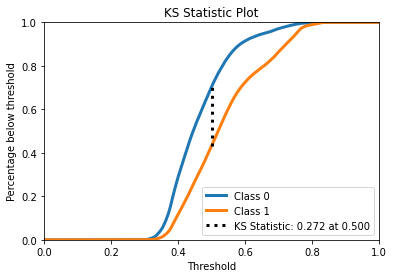

Acurácia: 0.635703645629165
Recall: 0.56890631125049
Precision: 0.6566283594244865
F1: 0.6096278249180879
AUROC: 0.6877607452577378
AURP: 0.6860913885968859


In [65]:
# Cuidado: usar esses parâmetros muito elevados, ou o default (100 estimadores e profundidade ilimitada) vai travar seu computador

# Parâmetros default:
# n_estimators=100, *,
# criterion="gini",
# max_depth=None,
# min_samples_split=2,
# min_samples_leaf=1,
# min_weight_fraction_leaf=0.,
# max_features="auto",
# max_leaf_nodes=None,
# min_impurity_decrease=0.,
# min_impurity_split=None,
# bootstrap=True,
# oob_score=False,
# n_jobs=None,
# random_state=None,
# verbose=0,
# warm_start=False,
# class_weight=None,
# ccp_alpha=0.0,
# max_samples=None

def compute_performance_metrics(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

random_forest = RandomForestClassifier(n_estimators=128, max_depth=8, min_samples_leaf=2, min_samples_split=4, oob_score=True)
df_treino = treino_ina.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1).append(treino_adi.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1))
df_validacao = valid_ina.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1).append(valid_adi.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1))
df_validacao.drop(columns=['INDEX'], axis=1, inplace=True)

random_forest.fit(df_treino, [0]*len(treino_ina)+[1]*len(treino_adi))

rf_pred_class  = random_forest.predict(df_validacao)
rf_pred_scores = random_forest.predict_proba(df_validacao)

accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics([0]*len(valid_ina)+[1]*len(valid_adi), rf_pred_class, rf_pred_scores)
print('Acurácia: {}\nRecall: {}\nPrecision: {}\nF1: {}\nAUROC: {}\nAURP: {}'.format(accuracy, recall, precision, f1, auroc, aupr))

In [12]:
import optuna

ds_dropado = ds.drop(labels=['IND_BOM_1_2', 'IND_BOM_1_1'], axis=1)
df_treino = treino_ina.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1).append(treino_adi.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1))
df_validacao = valid_ina.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1).append(valid_adi.drop(['IND_BOM_1_2','IND_BOM_1_1'], axis=1))
df_validacao.drop(columns=['INDEX'], axis=1, inplace=True)

def compute_performance_metrics_sem_plot(y, y_pred_class, y_pred_scores=None):
    accuracy = accuracy_score(y, y_pred_class)
    recall = recall_score(y, y_pred_class)
    precision = precision_score(y, y_pred_class)
    f1 = f1_score(y, y_pred_class)
    performance_metrics = (accuracy, recall, precision, f1)
    if y_pred_scores is not None:
        # skplt.metrics.plot_ks_statistic(y, y_pred_scores)
        # plt.show()
        y_pred_scores = y_pred_scores[:, 1]
        auroc = roc_auc_score(y, y_pred_scores)
        aupr = average_precision_score(y, y_pred_scores)
        performance_metrics = performance_metrics + (auroc, aupr)
    return performance_metrics

def rf(trial):
    n_estimators = trial.suggest_int("n_estimators", 16, 128)
    max_depth = trial.suggest_int("max_depth", 2, 16)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 2, 8)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 8)
    random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion, bootstrap=True, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    print('Random Forest com {} estimadores e profundidade máxima {}, critério {}, min amostras de folhas {} e min divisão de amostras {}\n'.format(
        n_estimators, max_depth, criterion, min_samples_leaf, min_samples_split
    ))
    # start = time.time()
    # n_scores = cross_val_score(random_forest, ds_dropado, ds['IND_BOM_1_2'], scoring='accuracy', n_jobs=1, error_score='raise')
    # print('Acurácia e desvio padrão: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    # print("Tempo: ", format(time.time() - start, '.3f'), 's\n', sep='')

    random_forest.fit(df_treino, [0]*len(treino_ina)+[1]*len(treino_adi))
    rf_pred_class  = random_forest.predict(df_validacao)
    rf_pred_scores = random_forest.predict_proba(df_validacao)
    accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics_sem_plot([0]*len(valid_ina)+[1]*len(valid_adi), rf_pred_class, rf_pred_scores)
    print('Acurácia: {}\nRecall: {}\nPrecision: {}\nF1: {}\nAUROC: {}\nAURP: {}\n\n'.format(accuracy, recall, precision, f1, auroc, aupr))
    return accuracy

study_1 = optuna.create_study(direction="maximize")
study_1.optimize(rf, n_trials=64)

[I 2021-11-25 19:01:19,179] A new study created in memory with name: no-name-287b067a-349f-48dd-9bc9-60f1dacd8722


Random Forest com 7 estimadores e profundidade máxima 5, critério entropy, min amostras de folhas 7 e min divisão de amostras 2



[I 2021-11-25 19:01:23,653] Trial 0 finished with value: 0.6158526068208545 and parameters: {'n_estimators': 7, 'max_depth': 5, 'criterion': 'entropy', 'min_samples_leaf': 7, 'min_samples_split': 2}. Best is trial 0 with value: 0.6158526068208545.


Acurácia: 0.6158526068208545
Recall: 0.5204233633869071
Precision: 0.6431796600972811
F1: 0.5753263187089394
AUROC: 0.6617996993976736
AURP: 0.6598541224326315
Random Forest com 5 estimadores e profundidade máxima 2, critério gini, min amostras de folhas 3 e min divisão de amostras 7



[I 2021-11-25 19:01:25,331] Trial 1 finished with value: 0.5636456291650334 and parameters: {'n_estimators': 5, 'max_depth': 2, 'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 7}. Best is trial 0 with value: 0.6158526068208545.


Acurácia: 0.5636456291650334
Recall: 0.4412230497843983
Precision: 0.584281561461794
F1: 0.5027739312994148
AUROC: 0.6043091812174717
AURP: 0.5969463864885365
Random Forest com 6 estimadores e profundidade máxima 10, critério gini, min amostras de folhas 6 e min divisão de amostras 3



[I 2021-11-25 19:01:31,484] Trial 2 finished with value: 0.626844374754998 and parameters: {'n_estimators': 6, 'max_depth': 10, 'criterion': 'gini', 'min_samples_leaf': 6, 'min_samples_split': 3}. Best is trial 2 with value: 0.626844374754998.


Acurácia: 0.626844374754998
Recall: 0.5760564484515877
Precision: 0.6411854023770878
F1: 0.6068785516056561
AUROC: 0.6760568607694294
AURP: 0.673766642815074
Random Forest com 8 estimadores e profundidade máxima 5, critério gini, min amostras de folhas 3 e min divisão de amostras 8



[I 2021-11-25 19:01:35,867] Trial 3 finished with value: 0.6166601332810663 and parameters: {'n_estimators': 8, 'max_depth': 5, 'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 8}. Best is trial 2 with value: 0.626844374754998.


Acurácia: 0.6166601332810663
Recall: 0.5284986279890239
Precision: 0.6416333523700742
F1: 0.5795967499247667
AUROC: 0.666919171104682
AURP: 0.6645444549549462
Random Forest com 5 estimadores e profundidade máxima 12, critério entropy, min amostras de folhas 3 e min divisão de amostras 4



KeyboardInterrupt: 

In [ ]:
# Parâmetros default:
# *,loss='deviance', 
# learning_rate=0.1, 
# n_estimators=100,
# subsample=1.0, 
# criterion='friedman_mse', 
# min_samples_split=2,
# min_samples_leaf=1, 
# min_weight_fraction_leaf=0.,
# max_depth=3, 
# min_impurity_decrease=0.,
# min_impurity_split=None, 
# random_state=None, 
# max_features=None, verbose=0,
# max_leaf_nodes=None, 
# warm_start=False,
# validation_fraction=0.1, 
# n_iter_no_change=None, 
# tol=1e-4,
# ccp_alpha=0.0

gradient_boost = GradientBoostingClassifier(n_estimators = 5, max_depth = 8)
n_scores = cross_val_score(gradient_boost, x_rf, y_rf, scoring='accuracy', n_jobs=1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))